In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
earthquake_data = pd.read_csv('earthquakes.csv')
earthquake_data.info()
earthquake_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9662 entries, 0 to 9661
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9662 non-null   object 
 1   latitude         9662 non-null   float64
 2   longitude        9662 non-null   float64
 3   depth            9662 non-null   float64
 4   mag              9661 non-null   float64
 5   magType          9661 non-null   object 
 6   nst              7316 non-null   float64
 7   gap              7316 non-null   float64
 8   dmin             5868 non-null   float64
 9   rms              9662 non-null   float64
 10  net              9662 non-null   object 
 11  id               9662 non-null   object 
 12  updated          9662 non-null   object 
 13  place            9662 non-null   object 
 14  type             9662 non-null   object 
 15  horizontalError  6691 non-null   float64
 16  depthError       9661 non-null   float64
 17  magError      

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.40,0.340,8.0,automatic,nc,nc
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,NaN,1.50,NaN,NaN,automatic,ak,ak
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.92,0.127,18.0,reviewed,us,us


In [3]:
missing_values = earthquake_data.isnull().sum()

missing_values

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2346
gap                2346
dmin               3794
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2971
depthError            1
magError           2379
magNst             2356
status                0
locationSource        0
magSource             0
dtype: int64

In [4]:
statistics_summary = earthquake_data.describe()
statistics_summary

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9662.000000,9662.000000,9662.000000,9661.000000,7316.000000,7316.000000,5868.000000,9662.000000,6691.000000,9661.000000,7283.000000,7306.000000
mean,40.912697,-116.671667,23.355603,1.565404,22.765856,117.215181,0.595249,0.288808,1.673778,2.099876,0.225285,16.652614
std,18.974728,65.423597,52.890429,1.202643,22.257144,66.359577,2.084116,0.266167,3.799421,4.939657,0.343733,27.449907
min,-65.899300,-179.994000,-3.430000,-1.020000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.991375,-152.311550,2.850000,0.770000,10.000000,68.000000,0.020028,0.100000,0.260000,0.400000,0.111000,6.000000
50%,38.836499,-122.788833,8.180000,1.340000,16.000000,99.000000,0.061570,0.180000,0.440000,0.700000,0.165206,10.000000
75%,57.997700,-116.590667,17.007500,2.000000,28.000000,151.475000,0.173125,0.460000,1.028817,1.530000,0.237541,18.000000
max,79.568100,179.977500,649.778000,7.100000,393.000000,357.000000,35.654000,2.820000,176.932676,87.300000,5.240000,504.000000


In [5]:
mean_magnitude = earthquake_data['mag'].mean()
median_magnitude = earthquake_data['mag'].median()

mean_magnitude, median_magnitude

(1.5654040784129475, 1.34)

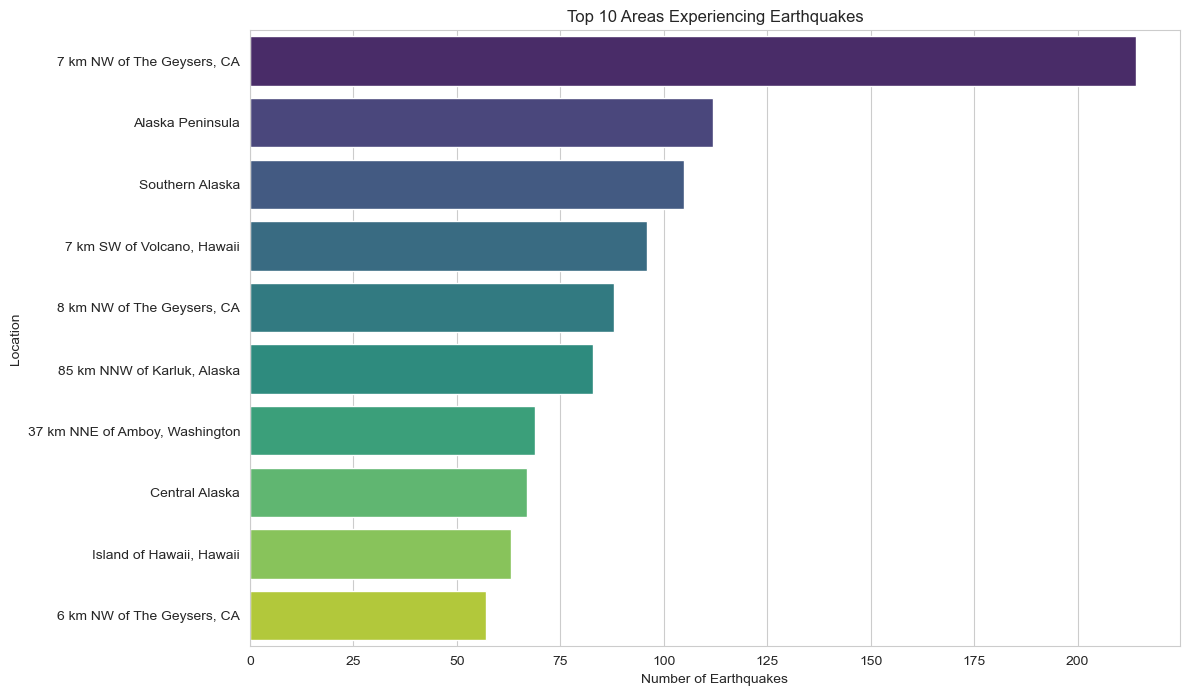

In [6]:
top_10_locations = earthquake_data['place'].value_counts().head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='viridis')
plt.title('Top 10 Areas Experiencing Earthquakes')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location')
plt.show()

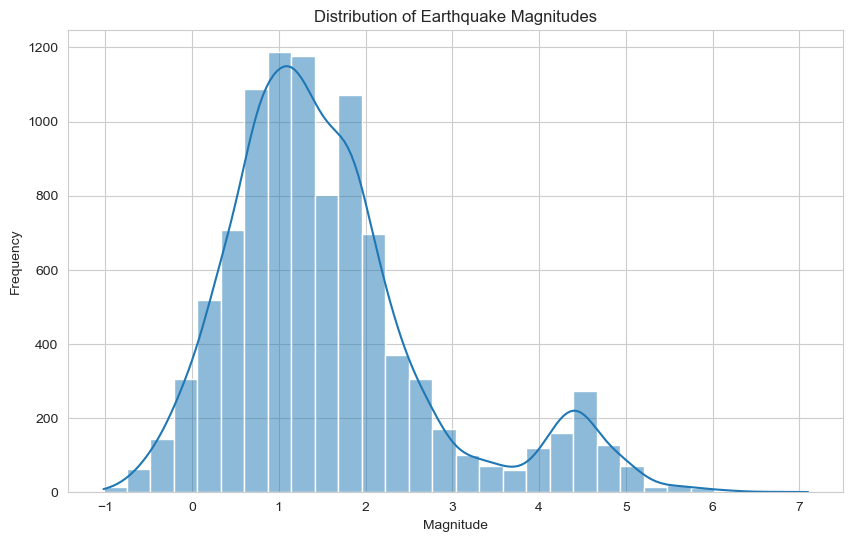

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(earthquake_data['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

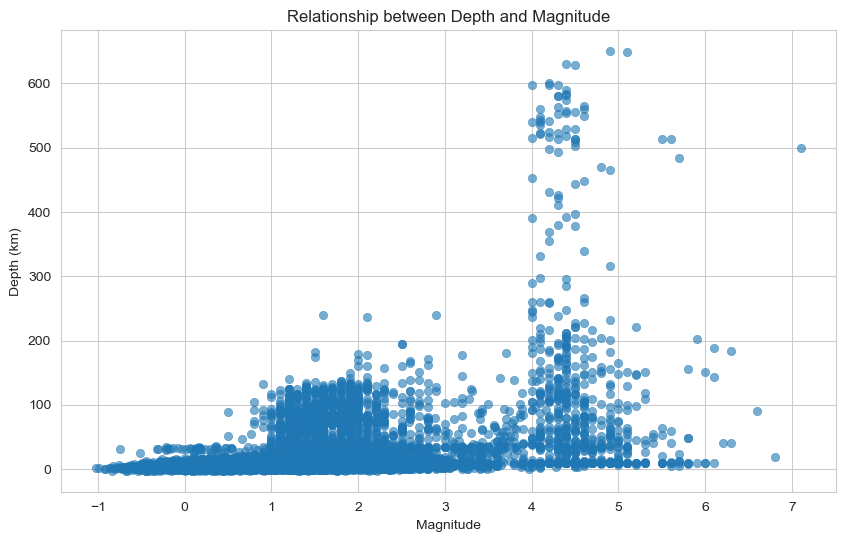

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(y='depth', x='mag', data=earthquake_data, alpha=0.6, edgecolor=None)
plt.title('Relationship between Depth and Magnitude')
plt.ylabel('Depth (km)')
plt.xlabel('Magnitude')
plt.show()